In [ ]:
!pip install umap-learn 
!pip install phate
!pip install scprep umap-learn magic-impute s_gd2

     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 29.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9cd85ab03f23ae10b1d0c07f47f20e7c51ede7c567bf60f3cb51947b8017b3d8
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=1713ebedb7e996f5c1d627dfe884bc41028feba6491cff6aece60b86e7ef236f
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
     |████████████████████████████████| 104 kB 32.9 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
     |████████████████████████████████| 416 kB 16.9 MB/s 
     |████████████████████████████████| 1.8 MB 43.4 MB/s 


[0 1 2]
[1.         1.44466786 2.08706523]


In [ ]:
#code of sc-PHENIX for computing a small size samples.

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import umap

import time

def run_pca(data,n_components=30,random_state =1):
    today= time.ctime()
  
    
    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data= pca.fit_transform(data)
    print('process start',today)
    return pca_data


def run_umap(pca_data, n_neighbors=15, n_components=2, metric='euclidean', metric_kwds=None,
             output_metric='euclidean', output_metric_kwds=None, n_epochs=None, learning_rate=1.0, 
             init='spectral', min_dist=0.1, spread=1.0, low_memory=True, n_jobs=-1, set_op_mix_ratio=1.0, 
             local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0,
             a=None, b=None, random_state=None, angular_rp_forest=False, target_n_neighbors=-1,
             target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42,
             transform_mode='embedding', force_approximation_algorithm=False, verbose=False, 
             unique=False, densmap=False, dens_lambda=2.0, dens_frac=0.3, dens_var_shift=0.1, 
             output_dens=False, disconnection_distance=None):
    
    fit = umap.UMAP(n_neighbors, n_components, metric, metric_kwds,
             output_metric, output_metric_kwds, n_epochs, learning_rate, 
             init, min_dist, spread, low_memory, n_jobs, set_op_mix_ratio, 
             local_connectivity, repulsion_strength, negative_sample_rate, transform_queue_size,
             a, b, random_state, angular_rp_forest, target_n_neighbors,
             target_metric, target_metric_kwds, target_weight, transform_seed,
             transform_mode, force_approximation_algorithm, verbose, 
             unique, densmap, dens_lambda, dens_frac, dens_var_shift, 
             output_dens, disconnection_distance)
    dim_reduction = fit.fit_transform(pca_data)
    
    return dim_reduction


def sc_PHENIX(data, umap_data,t=10,decay=15,metric='euclidean',knn=10):



    print('calculando distancias')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))
    
    print('imputation')
    
    Matix_col_genes_row_cell2 = (data +1) - data
    
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    
    sc_PHENIX = Matix_impu 
    
    print('done')
    end= time.ctime()
    print('done',end)


    return (sc_PHENIX)


def sc_PHENIX_R(data, umap_data, t=10,decay=15,metric='cosine',knn=10):
    


    print('calculando distancias eucle')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))



    rescale_percent =99.99
    M99 = np.percentile(data, rescale_percent, axis=0)
    M100 = data.max(axis=0)
    indices = np.where(M99 == 0)[0]
    M99[indices] = M100[indices]



    M99_new = np.percentile(data_new, rescale_percent, axis=0)
    M100_new = data_new.max(axis=0)
    indices = np.where(M99_new == 0)[0]
    M99_new[indices] = M100_new[indices]


    max_ratio = np.divide(M99, M99_new)
    data_new = np.multiply(data_new, np.tile(max_ratio, (len(data), 1)))



    print('reescalate')

    
    print('imputation')
    
    Matix_col_genes_row_cell2 = (data +1) - data
    
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    
    Matix_impu = Matix_impu 
    
    print('done')
    end= time.ctime()
    print('done',end)


    return (Matix_impu)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datos_w_cat =  pd.read_csv('/content/tabla_completa_w_controls.csv',index_col='Genus')

In [ ]:
datos_w_days =  pd.read_csv('/content/tabla_completa_w_controls.csv')

In [ ]:
daays = datos_w_days['Genus'].str.split('d', 1, expand=True)
daays

,0,1
0,cov1,0
1,cov1,5
2,cov1,9
3,cov1,15
4,cov2,0
...,...,...
65,p2,None
66,p3,None
67,p4,None
68,p5,None


In [ ]:
paciente= daays[0].str.split('v', 1, expand=True)
paciente[1]
paciente= paciente[1].to_numpy()
paciente= paciente.astype(np.float)
paciente

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


array([ 1.,  1.,  1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,
        5.,  5.,  5.,  5.,  5.,  6.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,
        8.,  8.,  8.,  8.,  9., 10., 10., 10., 11., 11., 12., 12., 12.,
       12., 12., 13., 14., 14., 15., 15., 15., 15., 15., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [ ]:
days= daays[1].to_numpy()
days= days.astype(np.float)
days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([ 0.,  5.,  9., 15.,  0.,  2.,  0.,  3.,  4., 14.,  0.,  4., 22.,
        0.,  3.,  5.,  9., 11.,  0.,  1.,  0.,  2.,  7.,  9.,  0.,  1.,
        3.,  4.,  6.,  9.,  0.,  0.,  2.,  5.,  0.,  5.,  0.,  3.,  5.,
        7.,  8.,  0.,  0.,  2.,  0.,  4.,  6.,  7.,  9., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [ ]:
labels= datos_w_cat['severity']

In [ ]:
labels

Genus
cov1d0     4
cov1d5     4
cov1d9     4
cov1d15    4
cov2d0     2
          ..
p2         6
p3         6
p4         6
p5         6
p6         6
Name: severity, Length: 70, dtype: int64

In [ ]:
datos_w_cat

,Caldisericum,Coprothermobacter,Dictyoglomus,Calditerrivibrio,Denitrovibrio,Deferribacter,Flexistipes,Caldithrix,Desulfurispirillum,Thermovibrio,...,Natrialba,Natrinema,Haloterrigena,Natronococcus,Other,type,severity,antibiotics,positive,negative
Genus,,,,,,,,,,,,,,,,,,,,,
cov1d0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,235,17
cov1d5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,31,1,4,0,159,246
cov1d9,0,0,21,0,0,19,21,55,78,0,...,67,85,523,63,2386,1,4,0,156,991
cov1d15,0,0,25,0,0,0,0,17,0,0,...,0,0,0,0,13,1,4,0,150,957
cov2d0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,105,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2,0,0,0,71,27,0,0,0,0,0,...,0,0,0,0,0,3,6,3,150,145
p3,0,0,0,0,0,0,0,0,0,0,...,15,0,0,21,0,3,6,3,109,204
p4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,6,3,115,152


In [ ]:
datos= datos_w_cat.iloc[:,:1210]
datos

,Caldisericum,Coprothermobacter,Dictyoglomus,Calditerrivibrio,Denitrovibrio,Deferribacter,Flexistipes,Caldithrix,Desulfurispirillum,Thermovibrio,...,Natronobacterium,Halobiforma,Natronolimnobius,Halostagnicola,Salinarchaeum,Natrialba,Natrinema,Haloterrigena,Natronococcus,Other
Genus,,,,,,,,,,,,,,,,,,,,,
cov1d0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cov1d5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,31
cov1d9,0,0,21,0,0,19,21,55,78,0,...,0,0,0,11,24,67,85,523,63,2386
cov1d15,0,0,25,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,13
cov2d0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2,0,0,0,71,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,0,0,21,0
p4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labeles_1 = labels.astype('category')

In [ ]:
import umap
umap_op = umap.UMAP(n_components=2, init='random',verbose=True,metric='euclidean',n_epochs=500,min_dist=0.0001,n_neighbors=100,random_state=1,target_weight=0.8)#,target_weight=0.3,target_metric='braycurtis')
data_umap_vis = umap_op.fit_transform(datos,labeles_1)

UMAP(init='random', min_dist=0.0001, n_epochs=500, n_neighbors=100, random_state=1, target_weight=0.8, verbose=True)
Thu Mar 10 19:25:10 2022 Construct fuzzy simplicial set
Thu Mar 10 19:25:10 2022 Finding Nearest Neighbors
Thu Mar 10 19:25:10 2022 Finished Nearest Neighbor Search


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:2345: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



Thu Mar 10 19:25:10 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 10 19:25:13 2022 Finished embedding


In [ ]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(data_umap_vis, x=0, y=1, color= labeles_1)

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
imputed_ALL =sc_PHENIX(datos, data_umap_vis, t=3,decay=1,metric='euclidean',knn=5)

calculando distancias
(70, 70)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Thu Mar 10 19:25:13 2022


In [ ]:
imputed_ALL

,Caldisericum,Coprothermobacter,Dictyoglomus,Calditerrivibrio,Denitrovibrio,Deferribacter,Flexistipes,Caldithrix,Desulfurispirillum,Thermovibrio,...,Natronobacterium,Halobiforma,Natronolimnobius,Halostagnicola,Salinarchaeum,Natrialba,Natrinema,Haloterrigena,Natronococcus,Other
Genus,,,,,,,,,,,,,,,,,,,,,
cov1d0,0.537988,0.066769,14.212724,0.694709,7.020514,2.830624,2.142101,10.832070,8.193726,4.927461,...,0.230197,0.014908,0.591152,1.039246,2.299300,24.867526,8.811214,48.118581,30.443990,224.656495
cov1d5,0.537175,0.066670,14.249786,0.694042,7.025103,2.840321,2.152831,10.866706,8.234704,4.945111,...,0.230127,0.014886,0.590244,1.044991,2.311780,24.989356,8.856026,48.393669,30.581305,225.892415
cov1d9,0.640150,0.079400,16.159397,0.803622,6.298969,3.391326,2.663960,12.658396,10.087089,5.834305,...,0.256978,0.017720,0.703949,1.296905,2.867694,29.816923,10.853372,60.122773,35.937081,278.671096
cov1d15,0.550098,0.068257,14.197876,0.706546,7.015114,2.836784,2.141377,10.820818,8.181642,4.929639,...,0.232611,0.015239,0.604593,1.037012,2.295188,24.799919,8.795604,47.983077,30.361078,224.027734
cov2d0,4.490813,0.505056,1.556916,8.569711,1.121745,3.589419,4.041419,2.659864,1.196065,1.902717,...,0.259963,0.017177,4.483241,0.038380,0.120507,0.396872,1.166577,0.334115,0.537460,2.964997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2,2.166204,0.269635,2.905351,9.626981,3.867500,3.883319,0.893431,4.483998,3.691051,5.768042,...,0.815039,0.059691,2.383471,0.134267,0.422286,4.474795,3.544889,1.164745,4.883069,4.445429
p3,2.130093,0.265173,2.855332,9.592191,3.845078,3.861241,0.878632,4.448202,3.676961,5.756643,...,0.810103,0.058777,2.342614,0.131941,0.414760,4.470201,3.536877,1.145917,4.879996,4.375484
p4,2.116144,0.263466,2.837244,9.640072,3.860969,3.848323,0.872872,4.448885,3.666592,5.743236,...,0.807402,0.058369,2.327407,0.131104,0.412114,4.483679,3.528241,1.138107,4.898437,4.345132


In [ ]:
imputed_ALL.to_csv('t3_decay1_euclidean_knn_5.csv')

In [ ]:
data_hvg = scprep.select.highly_variable_genes(imputed_ALL, percentile=95)

In [ ]:
labeles_1.unique()

[4, 2, 3, 1, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

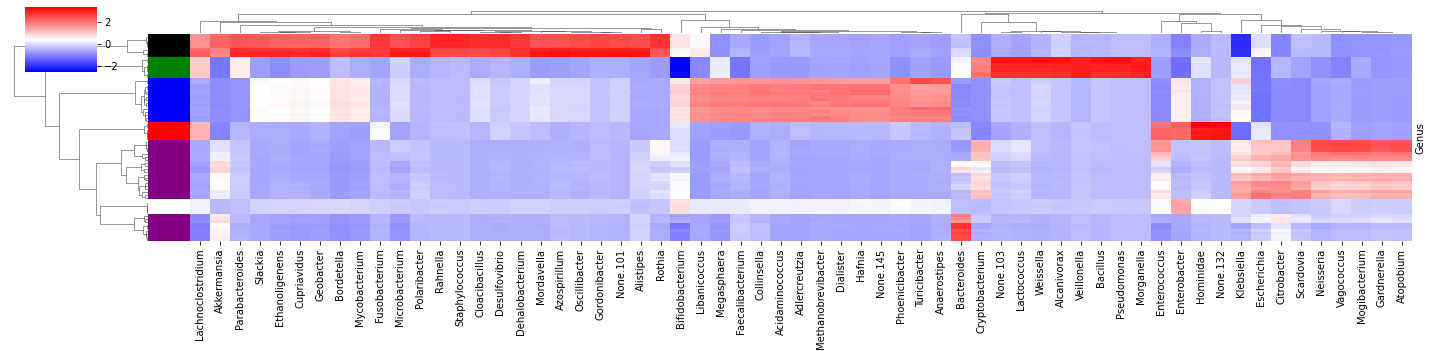

In [ ]:
#[4, 2, 3, 1, 5, 6] FROM 1 TO 4 ARE THE DEGREES OF SEVERITY Blue=5 (healthy controls), red= 6 pneumonia'

['Black= 4', 'Purple=2', 'Green=3','White=1','Blue=5 (sanos control)','red= 6 neumonia']
import seaborn as sns
lol= ['Black', 'Purple', 'Green','White','Blue','red']
lut = dict(zip(labeles_1.unique(), lol))
row_colors = labeles_1.map(lut)

ax = sns.clustermap(data_hvg.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="bwr",figsize=(20, 5),dendrogram_ratio=0.1,z_score=1)


MAGIC IMPUTAITON

In [ ]:
import magic
import pandas as pd
import matplotlib.pyplot as plt

magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(datos)

Calculating MAGIC...
  Running MAGIC on 70 cells and 1210 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.06 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 0.11 seconds.


/usr/local/lib/python3.7/dist-packages/graphtools/base.py:168: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, n_features) = 70
  RuntimeWarning,


In [ ]:
import scprep
data_hvg = scprep.select.highly_variable_genes(X_magic, percentile=95)

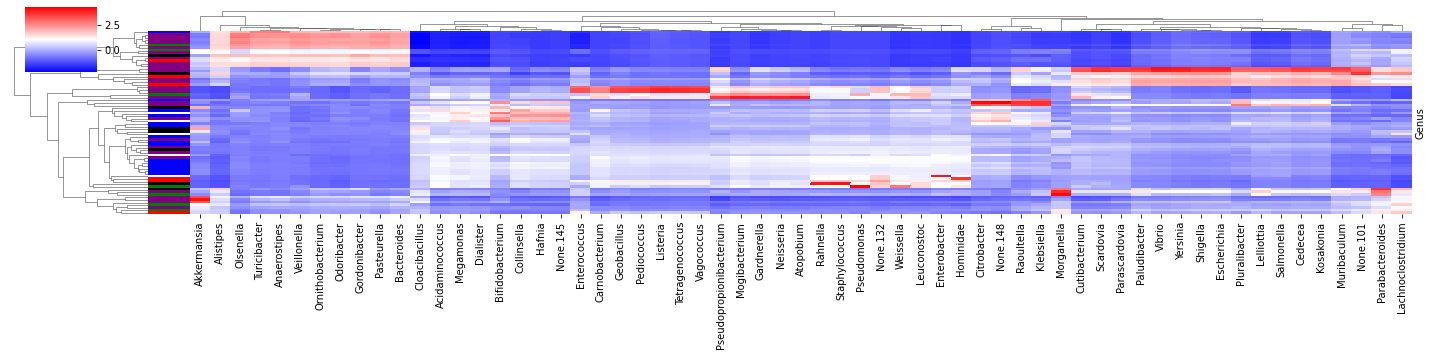

In [ ]:
#[4, 2, 3, 1, 5, 6] FROM 1 TO 4 ARE THE DEGREES OF SEVERITY Blue=5 (healthy controls), red= 6 pneumonia'

['Black= 4', 'Purple=2', 'Green=3','White=1','Blue=5 (sanos control)','red= 6 neumonia']
import seaborn as sns
lol= ['Black', 'Purple', 'Green','White','Blue','red']
lut = dict(zip(labels.unique(), lol))
row_colors = labels.map(lut)

ax = sns.clustermap(data_hvg.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="bwr",figsize=(20, 5),dendrogram_ratio=0.1,z_score=1)


In [ ]:
#MBIMPUTE

In [ ]:
mb_impute= pd.read_csv('/content/mbimputed.csv')

In [ ]:
mb_impute= mb_impute.set_index('Unnamed: 0')

In [ ]:
mb_impute

,Caldisericum,Coprothermobacter,Dictyoglomus,Calditerrivibrio,Denitrovibrio,Deferribacter,Flexistipes,Caldithrix,Desulfurispirillum,Thermovibrio,...,Natronobacterium,Halobiforma,Natronolimnobius,Halostagnicola,Salinarchaeum,Natrialba,Natrinema,Haloterrigena,Natronococcus,Other
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
cov1d0,12,12,12,12,12,12,12,12,12,12,...,0,0,0,0,0,0,0,0,0,0
cov1d5,10,16,8,8,8,10,21,13,13,10,...,0,0,0,0,0,0,0,0,10,29
cov1d9,31,0,31,47,0,15,15,47,63,0,...,0,0,0,0,15,63,79,507,47,2379
cov1d15,9,0,9,12,12,12,0,9,9,9,...,0,0,0,0,0,0,0,0,0,12
cov2d0,11,11,11,7,11,11,11,11,11,39,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2,14,18,0,67,14,22,18,11,14,18,...,0,0,0,0,0,0,0,0,0,0
p3,17,17,13,13,13,17,21,13,17,13,...,0,0,0,0,0,13,0,0,17,0
p4,10,10,10,10,10,10,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import scprep
data_hvg = scprep.select.highly_variable_genes(mb_impute, percentile=95)

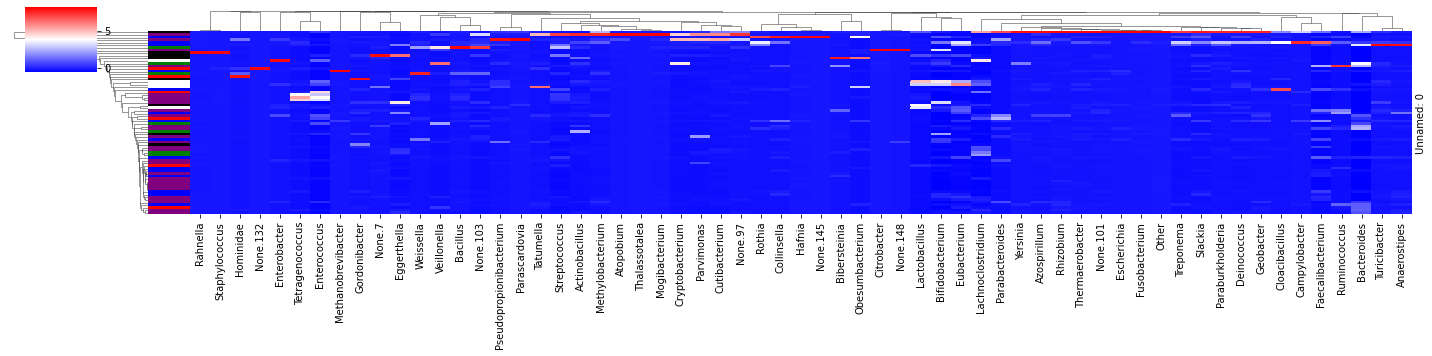

In [ ]:
#[4, 2, 3, 1, 5, 6] FROM 1 TO 4 ARE THE DEGREES OF SEVERITY Blue=5 (healthy controls), red= 6 pneumonia'

['Black= 4', 'Purple=2', 'Green=3','White=1','Blue=5 (sanos control)','red= 6 neumonia']
import seaborn as sns
lol= ['Black', 'Purple', 'Green','White','Blue','red']
lut = dict(zip(labels.unique(), lol))
row_colors = labels.map(lut)

ax = sns.clustermap(data_hvg.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="bwr",figsize=(20, 5),dendrogram_ratio=0.1,z_score=1)
